## Human Activity Recognition

* Human Activity Recognition, or HAR for short, is the problem of predicting what a person is doing based on a trace of their movement using sensors.

* This project is to build a model that predicts the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.

* This dataset is collected from 30 study participants, performing different activities with a smartphone mounted on their waists. The data is recorded with the help of inertial sensors (accelerometer and Gyroscope) in that smartphone. This experiment was video recorded to label the data manually




In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
train = pd.read_csv("G:\\Netzwerk assignments\\train.csv")
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
train.shape

(7352, 563)

In [4]:
test = pd.read_csv("G:\\Netzwerk assignments\\test.csv")
test.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [5]:
column_names=[]
for i in test.columns:
 column_names.append(i)


In [6]:
print(column_names)

['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tG

In [7]:
test.shape

(2947, 563)

#### The 'test' data contains information of 30% of the study participants i.e of 9 people. It is a time/frequency series data.

## Data Cleaning

In [8]:
train.duplicated().sum()

0

In [9]:
sum(test.duplicated())

0

In [10]:
train.isnull().values.sum()

0

In [11]:
test.isnull().values.sum()

0

### Data distribution

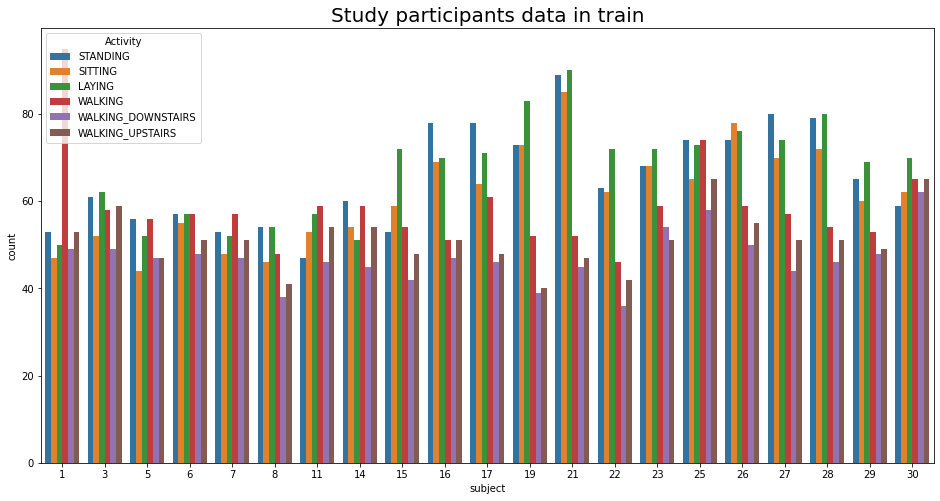

In [12]:
plt.figure(figsize=(16,8))
plt.title('Study participants data in train', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = train)
plt.show()

### The 'train' data contains information of 21 people i.e. 70% of the study participants.The data of remaining 9 subjects are put in the test data i.e 30% of the study participants. 

### Confirming the above claim by checking the test data

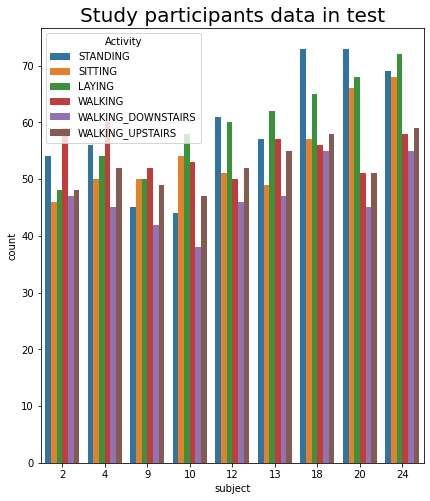

In [13]:
plt.figure(figsize=(6.86,8))
plt.title('Study participants data in test', fontsize=20)
sns.countplot(x='subject',hue='Activity', data = test)
plt.show()

#### Accelerometer vs. Gyrometer readings count

In [69]:
acc=0
gyro=0
others=0
for column in train.columns:
    if "Acc" in str(column):
        acc+=1
    elif "Gyro" in str(column):
        gyro+=1
    else:
        others+=1

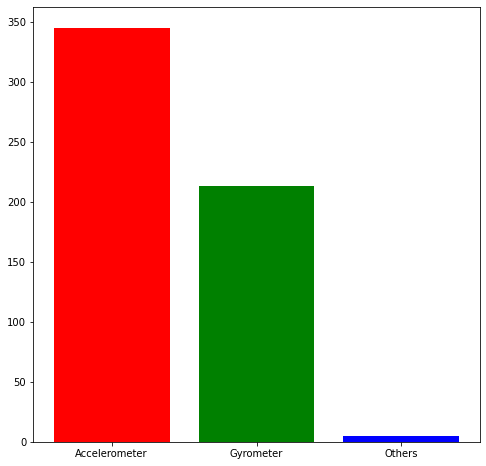

In [91]:
plt.figure(figsize=(8,8))
plt.bar(['Accelerometer','Gyrometer','Others'],[acc,gyro,others],color=['r','g','b']);

#### Class balance of Activity

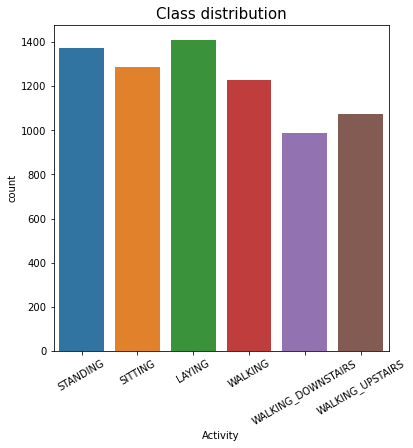

In [14]:
plt.figure(figsize=(6,6))
plt.title('Class distribution', fontsize=15)
sns.countplot(x='Activity', data = train)
plt.xticks(rotation = 30)
plt.show()

### Conclusion : The data has a good distribution balance

# Exploratory Data Analysis

###### Some domain knowlegde on acceleration and angular velocity helps to extract information from the data.<br><br><br> Static and Dynamic Activities <br><br>In static activities (sit, stand, lie down) the motion will be minimum. <br><br> In the dynamic activities (Walking, WalkingUpstairs,WalkingDownstairs) the motion will be significant.

In [15]:
import warnings
warnings.filterwarnings('ignore')

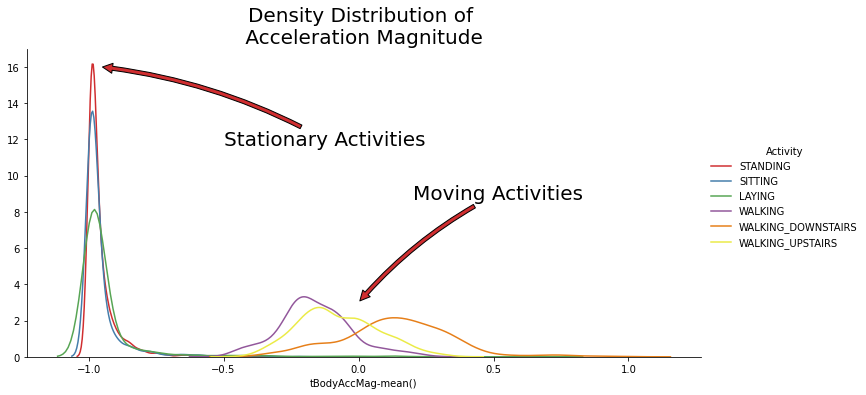

In [16]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.956,16), xytext=(-0.5, 12), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Density Distribution of \n Acceleration Magnitude ', fontsize=20)
plt.show()

#### We can observe that the stationary and moving activities have different PDFs.

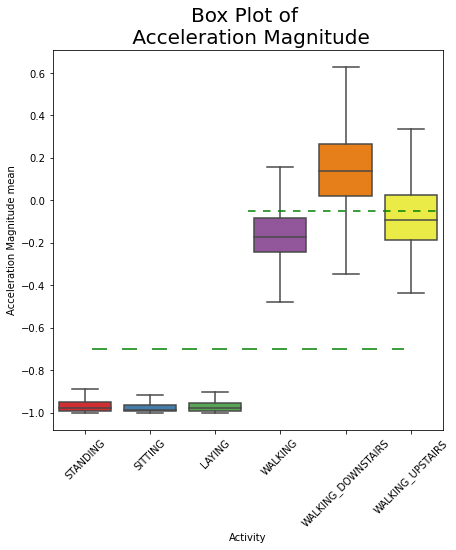

In [17]:
plt.figure(figsize=(7,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False, saturation=1) #showflier = outliers
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(10,10), c='g') #plt.axhline draws a horizontal line, y = postion
plt.axhline(y=-0.05, xmin=0.5,xmax = 1, dashes=(5,5), c='g') #dashes(width if line, width of space), c = color, g= green
plt.title('Box Plot of \n Acceleration Magnitude', fontsize=20)
plt.xticks(rotation=45)
plt.show()


#### Acceleration magnitude less than -0.7 indicates one of the stationary activities <br><br> Acceleration magnitude more that -0.7 indicates one of the moving activities <br><br> Walking downstairs has the maximum acceleration. More than 75% of the data of acceleration for Walking downstairs is positive


### Gyro sensor is present in the smartphone to sense angular rotational velocity and acceleration.

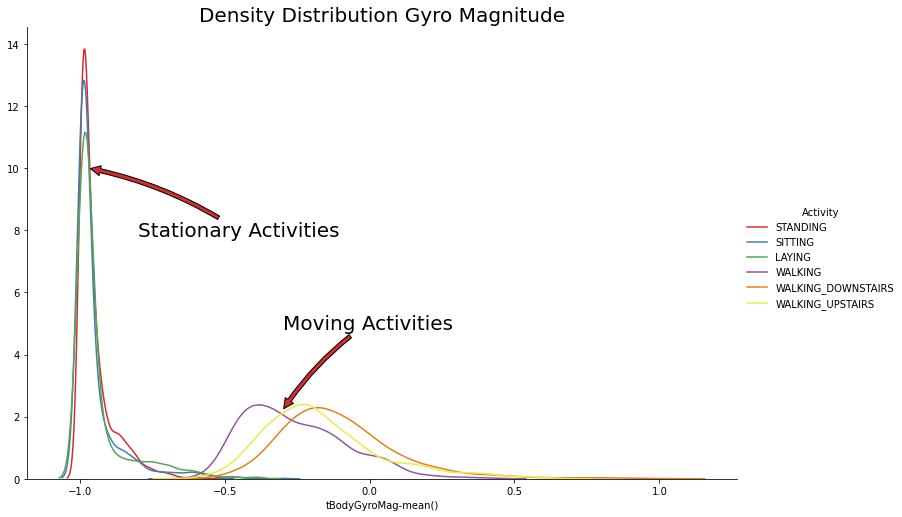

In [68]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=7,aspect=1.5)
facetgrid.map(sns.distplot,'tBodyGyroMag-mean()', hist=False).add_legend()
plt.annotate("Stationary Activities", xy=(-0.97,10), xytext=(-0.8, 8), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(-0.3,2.2), xytext=(-0.3,5), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Density Distribution Gyro Magnitude', fontsize=20)
plt.show()

#### The GyroMagnitude also bifurcates the Stationary and Moving activities. The change in direction of motion body involved in moving activity is significant.

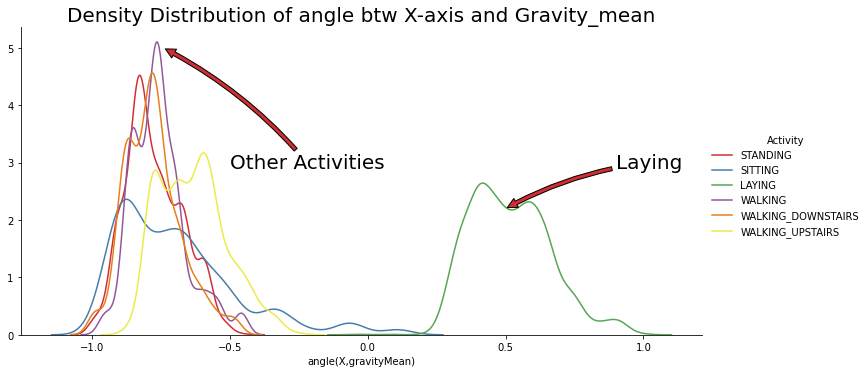

In [56]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train, hue='Activity', size=5,aspect=2)
facetgrid.map(sns.distplot,'angle(X,gravityMean)', hist=False).add_legend()
plt.annotate("Other Activities", xy=(-0.74,5), xytext=(-0.5, 3), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Laying", xy=(0.5,2.2), xytext=(0.9,3), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Density Distribution of angle btw X-axis and Gravity_mean', fontsize=20)
plt.show()

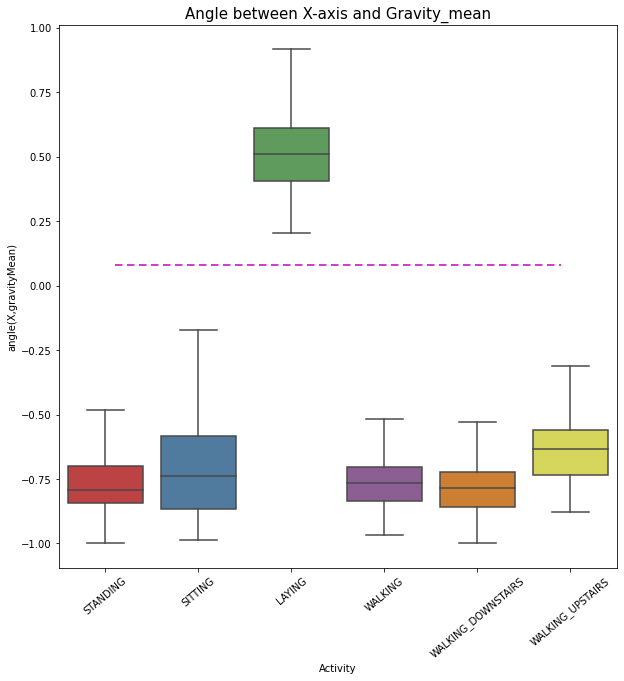

In [20]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train,  showfliers =False )
plt.axhline(y=0.08, xmin=0.1, xmax=0.9, c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

#### If angleX,gravityMean > 0 then Activity is Laying. <br><br> We can classify all datapoints belonging to Laying activity with just a single if else statement


## Principle Component Analysis

In [24]:
pca= PCA(n_components=15)
X_pca = pca.fit_transform(X_train)

In [25]:
train_pc = pd.DataFrame(X_pca, columns=['PC1', 'PC2' , 'PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15'])
train_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,-5.520280,-0.290278,-1.529929,1.333244,1.425091,-0.194634,0.577427,0.691505,-1.223178,-0.361454,-0.081877,0.047312,0.965837,1.244534,1.481469
1,-5.535350,-0.082530,-1.924804,0.671274,0.671260,0.735145,-0.616912,-0.771737,-0.615520,-0.895635,-0.339750,-0.072207,0.224214,0.282583,0.278136
2,-5.474988,0.287387,-2.144642,0.531807,0.207824,-0.037778,0.057624,0.093939,-0.063119,-0.217197,-0.178118,0.297826,-0.096381,0.181074,0.179104
3,-5.677232,0.897031,-2.018220,0.157125,0.759083,1.079556,-0.267796,-0.731346,0.281267,0.466538,-0.226498,-0.349102,-0.705112,0.073495,-0.144947
4,-5.748749,1.162952,-2.139533,0.207822,0.473089,0.463022,-0.152218,-0.107515,0.289900,0.538800,-0.388012,-0.095810,-0.442342,-0.256040,0.375369


In [31]:
train_pc.shape

(7352, 15)

In [27]:
pc_list = list(train_pc.columns)

In [28]:
def variance(data):
    n = len(data)
    mean = sum(data)/n
    deviations = [( x - mean)**2 for x in data]
    variance = sum(deviations)/n
    return variance

In [29]:
variance_list = []
for pc in pc_list:
    vari = variance(train_pc[pc])  # dont put data_pca['pc'] because it will become a string and a keyerror pops up
    variance_list.append(vari)

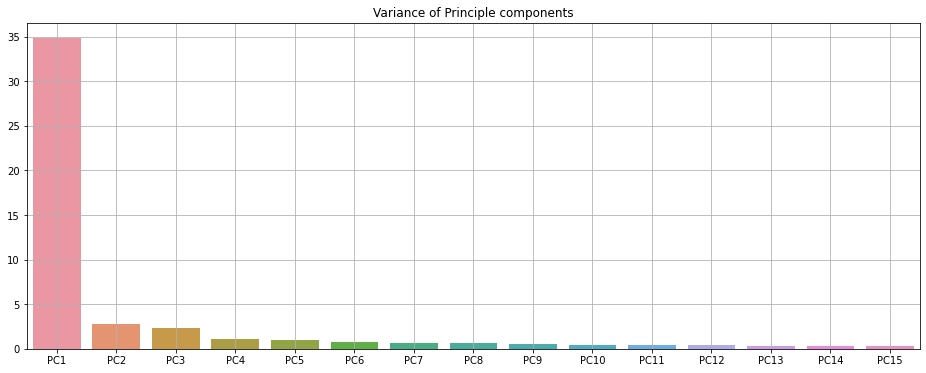

In [30]:
fig = plt.figure(figsize = (16,6))
sns.barplot(x=pc_list, y=variance_list)
#plt.xticks(rotation=90) 
plt.grid()
plt.title("Variance of Principle components")
plt.show()

 #### We see in the  first 5-6  principle components, the variance decreases considerably. So a lot of information from the original data is captured in the above 15 PCs.

In [33]:
variance_list

[34.81889378634326,
 2.7346742512910613,
 2.294080764344538,
 1.0436333230502461,
 0.9433886680367524,
 0.7080559823465663,
 0.6549634960122726,
 0.5950091318293746,
 0.5395737043031132,
 0.47758766641706696,
 0.42431036215336665,
 0.3742940862180105,
 0.322508759602153,
 0.3104187923430913,
 0.27768527371610346]

Text(0.5, 1.0, 'Scatter Plot of PC1 and PC2')

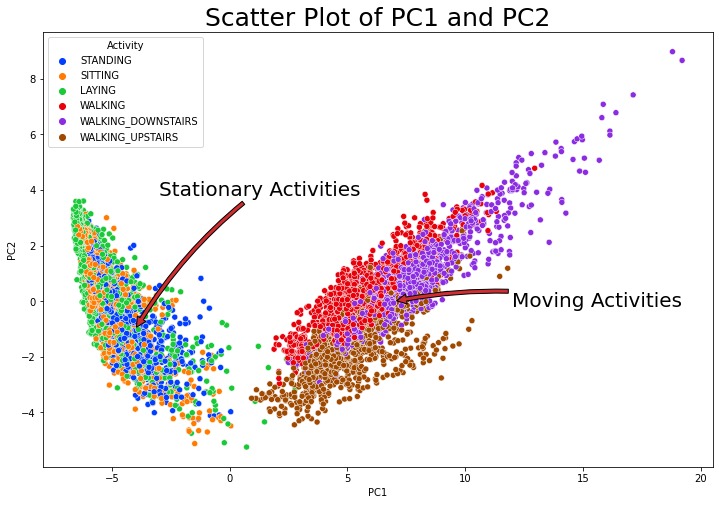

In [39]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = train_pc['PC1'], y = train_pc['PC2'], hue =train["Activity"], palette = "bright")
plt.annotate("Stationary Activities", xy=(-4,-1), xytext=(-3,4), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Moving Activities", xy=(7,0), xytext=(12,0), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Scatter Plot of PC1 and PC2', fontsize=25)

#### The above plot  confirms with the density distribution plot of Body Acceleration Magnitude

Text(0.5, 1.0, 'Scatter Plot of PC3 and PC4')

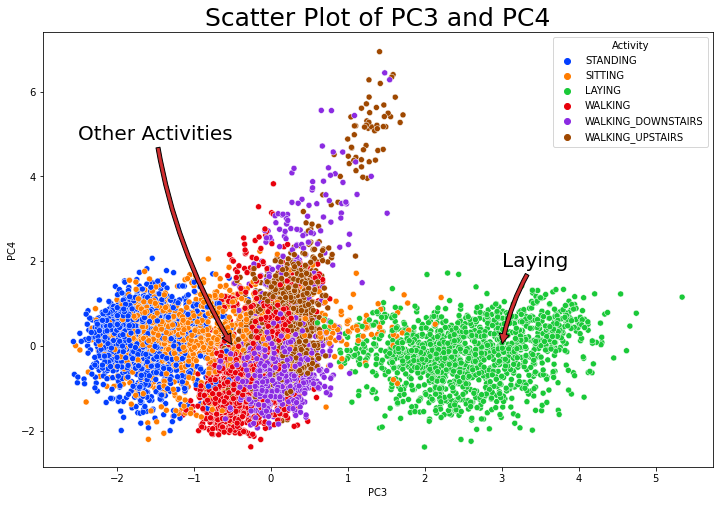

In [50]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = train_pc['PC3'], y = train_pc['PC4'], hue =train["Activity"], palette = "bright")
plt.annotate("Laying", xy=(3,0), xytext=(3,2), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.annotate("Other Activities", xy=(-0.5,0), xytext=(-2.5,5), size=20,va='center', ha='left',
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.title('Scatter Plot of PC3 and PC4', fontsize=25)

#### The above plot confirms with the density distribution plot of angle btw X-axis and Gravity_mean

Text(0.5, 1.0, 'Scatter Plot of PC5 and PC6')

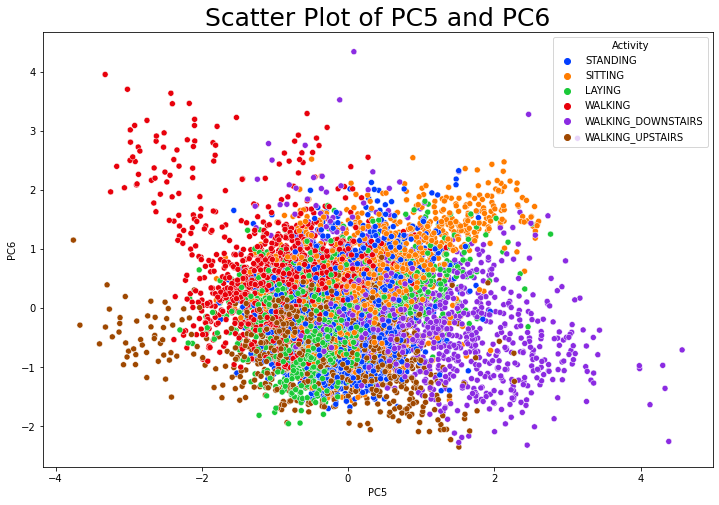

In [51]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = train_pc['PC5'], y = train_pc['PC6'], hue =train["Activity"], palette = "bright")
plt.title('Scatter Plot of PC5 and PC6', fontsize=25)

#### In the above plot we see no distinct grouping

# t-SNE 

In [21]:
X_train= train.drop(['subject', 'Activity'], axis=1)
y_train = train['Activity']

In [22]:
tSNE=  TSNE(n_components = 2, verbose=10, perplexity=30, n_iter = 1000).fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.013s...
[t-SNE] Computed neighbors for 7352 samples in 3.278s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.348516
[t-SNE] Computed conditional probabilities in 0.611s
[t-SNE] Iteration 50: error = 92.2120667, gradient norm = 0.0254684 (50 iterations in 5.777s)
[t-SNE] Iteration 100: error = 80.8247681, gradient norm = 0.0054310 (50 iterations in 5.037s)
[t-SNE] Iteration 150: error = 79.0606461, gradient norm = 0

<AxesSubplot:>

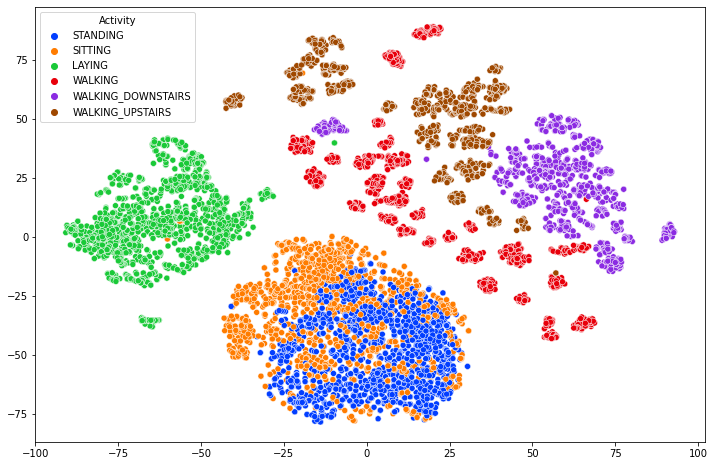

In [23]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = tSNE[:,0], y = tSNE[:,1], hue =train["Activity"], palette = "bright")

#### As we can see all the features except standing and sitting can be seperated to a good degree <br><br> Model will probably be confused between standing and sitting

# ANN

In [92]:
X_train=train.iloc[:,:-2]
y_train=train.iloc[:,-1]

X_test=test.iloc[:,:-2]
y_test=test.iloc[:,-1]

In [101]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y_train=encoder.fit_transform(y_train)
y_train=pd.get_dummies(y_train).values


In [102]:
y_train

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [103]:
y_test=encoder.fit_transform(y_test)
y_test=pd.get_dummies(y_test).values

In [113]:
#defining the type of model
model=Sequential()

In [114]:
#building the model
model.add(Dense(64,activation='relu',input_shape = (561,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [115]:
#getting the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                35968     
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 198       
Total params: 38,246
Trainable params: 38,246
Non-trainable params: 0
_________________________________________________________________


In [123]:
#compile the model by giving the loss function and the type of optimizer you need
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [128]:
#train the data
history = model.fit(X_train,y_train,batch_size = 300, epochs = 30)

Epoch 1/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0052 - accuracy: 0.9988
Epoch 2/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0044 - accuracy: 0.9986
Epoch 3/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0070 - accuracy: 0.9980
Epoch 4/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.9985
Epoch 5/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 6/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 0.9997: 0s - loss: 0.0027 - accuracy: 0.99
Epoch 7/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 0.9995
Epoch 8/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 9/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0028 - accuracy: 0.9997
Epoch 10/30
25/25 [==============================] - 0s 5ms/step - loss: 0.0023 - 

In [133]:
#evaluating the model using test data
score = model.evaluate(X_test,y_test)

93/93 [==============================] - 1s 2ms/step - loss: 0.2599 - accuracy: 0.9464


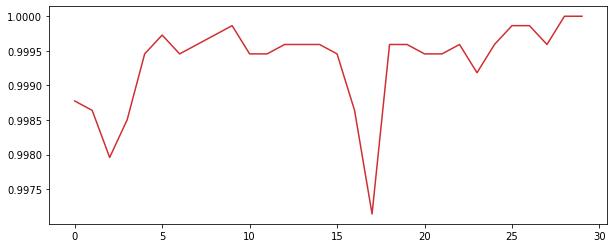

In [134]:
#plotting the accuracy
plt.plot(history.history['accuracy'])
plt.show()